# **Purwadhika Capstone Project 3 Python Documentation**
## **By: Sathya Narendra Atmajati Satoto**
- Google Colab: https://colab.research.google.com/drive/11BnlXnUiDdmGmTi_2P762_hS0-F8IKAk?usp=drive_link
- Presentation: https://drive.google.com/file/d/1ps8FVIe8azTvBNRCDsDwfg6iRGsmqp7R/view?usp=sharing
- Dashboard: https://lookerstudio.google.com/reporting/8885a181-1f77-4954-8b7d-2af61019ceab

In this data analysis project, we will use the NYC TLC Trip Record dataset to gain insight and give recommendations based on data.

**Pipeline:**
1. Data Import and Description
2. Data Cleaning
3. Data Transformation
4. Export Data
5. Analysis & Visualization


## **1. Data Import and Description**

In this section, data will be imported from a .csv file and then statistically explored to gain insight into the form of the data. Here we may gain information such as:
1. column statistical knowledge
2. column data types

Furthermore, this section will also explore the company, stakeholders, and the goals of the project.

### **1.1 Data Background**

Firstly we need to clearly define the background to the project and the problem that data analysis and visualization can help resolve.

#### - The New York City Taxi and Limousine Commission (NYC TLC) formed in 1971, is the agency responsible for licensing and regulating:
  - yellow taxis in New York City
  - for-hire vehicles
  - commuter vans
  - paratransit vehicles

#### - TLC prioritizes providing safe and reliable transportation options for all New Yorkers, and supports and contributes to citywide initiatives for:
  - traffic safety
  - accessibility
  - technological advancements

#### - Scenario:
  - As part of TLC's mission to ensure efficient and accessible transportation for all residents, TLC looks for ways to improve operational efficiency. This includes better meeting demand and improving overall profitability.

#### - Stakeholders:
  - NYC TLC Chief commisioner
  - Deputy Commissioner of Operations, People & Innovation
  - Deputy Commissioner for Policy and Community Affairs
  - NYC TLC Chief Information Officer

#### - Therefore, we can define the problem statement:
  - How can NYC TLC strategically position taxis across the city to serve the highest number of passengers while maximizing revenue and resource utilization?


### **1.2 Data Dictionary**
Here are the data dictionary of variables/columns in the dataset. There are missing descriptions for some variables, marked in bold, which have been updated from the [nyc taxi trips data dictionaries](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).


1. **VendorID**: A code indicating the LPEP provider that provided the record.
- 1 = Creative Mobile Technologies,LLC.
- 2 = VeriFoneInc

2. **lpep_pickup_datetime**: The date and time when the meter was engaged.

3. **lpep_dropoff_datetime**: The date and time when the meter was disengaged.

4. **store_and_fwd_flag**: This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka “store and forward, because the vehicle did not have a connection to the server.
- Y = store and forward trip
- N = not a store and forward trip

5. **RatecodeID**: The final rate code is in effect at the end of the trip.
- 1 = Standard rate
- 2 = JFK
- 3 = Newark
- 4 = Nassau or Wechester
- 5 = Negotiated fare
- 6 = Group ride

6. **PULocationID**: TLC Taxi Zone in which the taxi meter was engaged.

7. **DOLocationID**: TLC Taxi Zone in which the taxi meter was disengaged.

8. **passenger_count**: The number of passengers in the vehicle. This is a driver-entered value.

9. **trip_distance**: The elapsed trip distance in miles was reported by the taxi meter.

10. **fare_amount**: The time-and-distance fare is calculated by the meter.Extra Miscellaneous extras and surcharges. Currently, this only includes the \$0.50 and \$1 rush hour and overnight charges.

11. **extra**: * **Miscellaneous extras and surcharges.** *

12. **mta_tax**: \$0.50 MTA tax that is automatically triggered based on the metered rate in use.

13. **tip_amount**: This field is automatically populated for credit card tips. Cash tips are not included.

14. **tolls_amount**: The total amount of tolls paid in the trip.

15. **ehail_fee**: MISSING

16. **improvement_surcharge**: \$0.30 improvement surcharge assessed on hailed trips at the flag drop.The improvement surcharge began being levied in 2015.

17. **total_amount**: The total amount charged to passengers. Does not include cash tips.

18. **payment_type**: A numeric code signifying how the passenger paid for the trip.
- 1 = Credit card
- 2 = Cash
- 3 = No charge
- 4 = Dispute
- 5 = Unknown
- 6 = Voidedtrip

19. **trip_type**: A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.
- 1 = Street-hail
- 2 = Dispatch

20. **congestion_surcharge**: * **Extra charge when congestion happens** *

### **1.3 Import Data**

Here we import helper Python libraries and the .csv file to explore and process the data.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import math
from google.colab import auth
from urllib.parse import quote

In [ ]:
# Import trip records into df from google sheets spreadsheet
auth.authenticate_user()
sheet_id = '1YU_Uf-_23Wq95QpocR1JYEw3-gPZYR1tCdgXJKXLdjw'
sheet_name='NYC TLC Trip Record'
encoded_sheet_name = quote(sheet_name)
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={encoded_sheet_name}'
df = pd.read_csv(url)
df.head(10)

<ipython-input-2-3e62f1ace9b3>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.00,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.00,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.00,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.50,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.50,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.00,0.5,0.00,0.0,NaN,1.0,22.95,2.0,1.0,2.75
6,1,2023-01-01 00:09:14,2023-01-01 00:26:39,N,1.0,181,45,2.0,3.80,19.1,3.75,1.5,4.85,0.0,NaN,1.0,29.20,1.0,1.0,2.75
7,2,2023-01-01 00:11:58,2023-01-01 00:24:55,N,1.0,24,75,1.0,1.88,14.2,1.00,0.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00
8,2,2023-01-01 00:41:29,2023-01-01 00:46:26,N,1.0,41,166,2.0,1.11,7.2,1.00,0.5,1.00,0.0,NaN,1.0,10.70,1.0,1.0,0.00
9,2,2023-01-01 00:50:32,2023-01-01 01:13:42,N,1.0,24,140,1.0,4.22,24.7,1.00,0.5,3.00,0.0,NaN,1.0,32.95,1.0,1.0,2.75


In the import process above, I uploaded the file to a Google Sheets spreadsheet and then imported the data into the Python notebook.

### **1.4 Statistical Knowledge**

After importing the data, we can begin gathering statistical knowledge about it, which can be useful in subsequent processes.

In [ ]:
# Show total rows in the dataset, which can be used for calculating parts of the data such as percentages
df_len = len(df)
print(f"Total amount of rows: {df_len}")

Total amount of rows: 68211


In [ ]:
# Show data type of each column, to check whether the data types are in an acceptable format
df.dtypes

,0
VendorID,int64
lpep_pickup_datetime,object
lpep_dropoff_datetime,object
store_and_fwd_flag,object
RatecodeID,float64
PULocationID,int64
DOLocationID,int64
passenger_count,float64
trip_distance,float64
fare_amount,float64


From the description above, we can make some notes:
- lpep_pickup_datetime: Can use datetime data type to enable date calculations
- lpep_dropoff_datetime: Can use datetime data type to enable date calculations
- RatecodeID: Is a numeric category
- PULocationID: Is a numeric category
- DOLocationID: Is a numeric category
- payment_type: Is a numeric category
- trip_type: Is a numeric category


In [ ]:
# Statistical description of numeric data
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


In [ ]:
# Statistical description of string objects
df.describe(include='object')

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


From the two cells above, there are notable variables that can be explored futher such as:
1. Negative values in payment columns
2. Very high maximum trip distance value
3. Zero values in ehail_fee column

## **2. Data Cleaning**

In this section, data will be cleaned by detecting and handling of:
1. Duplicate data
2. Null/missing data
3. Data outliers

### **2.1 Duplicate Data Handling**
First we detect duplicate values and remove if there are any.

In [ ]:
# Check and handle duplicate values
df.duplicated().value_counts()

,count
False,68211


There are no duplicate values detected and therefore no data needs to be removed.

### **2.2 Missing Data Handling**
Next, we may check for missing values in each column of the dataframe. We handle missing values in each column in the following ways:
1. Drop missing values in the column if there are fewer than 5% missing values
2. Impute missing values with the column average if there are between 5% and 15% missing values
3. Drop the column otherwise

Furthermore, to determine which average to use when imputing columns, we use:
1. Mean: For measures (quantitative columns) with normal distribution
2. Median: For measures with not normal distribution
3. Mode: For dimensions (qualitative columns)

In [ ]:
# Check for null values in the data
# Show all columns with null values and the percentage
null_amounts = df.isnull().sum()
n = round(null_amounts[null_amounts > 0] / df_len * 100, 2).reset_index()
n.rename(columns={'index': 'Column', 0: 'Percentage of nulls (%)'}, inplace=True)
display(n)

,Column,Percentage of nulls (%)
0,store_and_fwd_flag,6.34
1,RatecodeID,6.34
2,passenger_count,6.34
3,ehail_fee,100.00
4,payment_type,6.34
5,trip_type,6.35
6,congestion_surcharge,6.34


In [ ]:
# Get column data distribution for measures with null values
ms_null_cols = ['passenger_count', 'congestion_surcharge']
for col in ms_null_cols:
  stat, pval = st.normaltest(df[col])

  if pval < 0.05:
    print(f"{col} is not normally distributed\n")
  else:
    print(f"{col} is normally distributed\n")


passenger_count is normally distributed

congestion_surcharge is normally distributed



Null handling for each column:
- store_and_fwd_flag (dimension): Fill in missing values with column average - mode

- RatecodeID (dimension): Fill in missing values with column average - mode

- passenger_count (measure): Fill in missing values with column average - rounded mean

- ehail_fee (measure): drop column because the column contains no values

- payment_type (dimension): Fill in missing values with column average - mode

- trip_type (dimension): Fill in missing values with column average - mode

- congestion_surcharge (measure): Fill in missing values with column average - mean

In [ ]:
# Make a new dataframe to be filled with imputed values
df_imputed = df.copy()

In [ ]:
# Impute missing values with mode for dimensions in the data
dm_null_cols = ['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type']
for col in dm_null_cols:
  col_mode = df_imputed[col].mode()[0]
  print(f"{col} mode: {col_mode}")
  df_imputed[col] = df_imputed[col].fillna(col_mode)

store_and_fwd_flag mode: N
RatecodeID mode: 1.0
payment_type mode: 1.0
trip_type mode: 1.0


In the Python code above, the missing values for categorical data are imputed with the column mode.

In [ ]:
# Impute missing values with mean for passenger_count and congestion_surcharge
pass_count_mean = round(df['passenger_count'].mean())
df_imputed['passenger_count'] = df_imputed['passenger_count'].fillna(pass_count_mean)

con_sc_mean = df['congestion_surcharge'].mean()
df_imputed['congestion_surcharge'] = df_imputed['congestion_surcharge'].fillna(con_sc_mean)

print(f"passenger_count mean: {pass_count_mean}")
print(f"congestion_surcharge mean: {con_sc_mean}")

passenger_count mean: 1
congestion_surcharge mean: 0.7267480082019816


In the Python code above, the missing values for quantitative data are imputed with the column mean.

In [ ]:
# Drop ehail_fee column
df_imputed.drop('ehail_fee', axis=1, inplace=True)

In [ ]:
# Count null values in the new imputed dataframe
imputed_nulls = df_imputed.isnull().sum().sum()
print(imputed_nulls)

0


Lastly, the ehail_fee column is dropped since it contains all missing values, which do not provide any information.

### **2.3 Data Outlier Handling**
Lastly, we can detect outliers in the data. This can be done by using boxplots and using data quantiles ranges for quantitative data, and for categorical data we may check for inconsistent value formats if there are any.

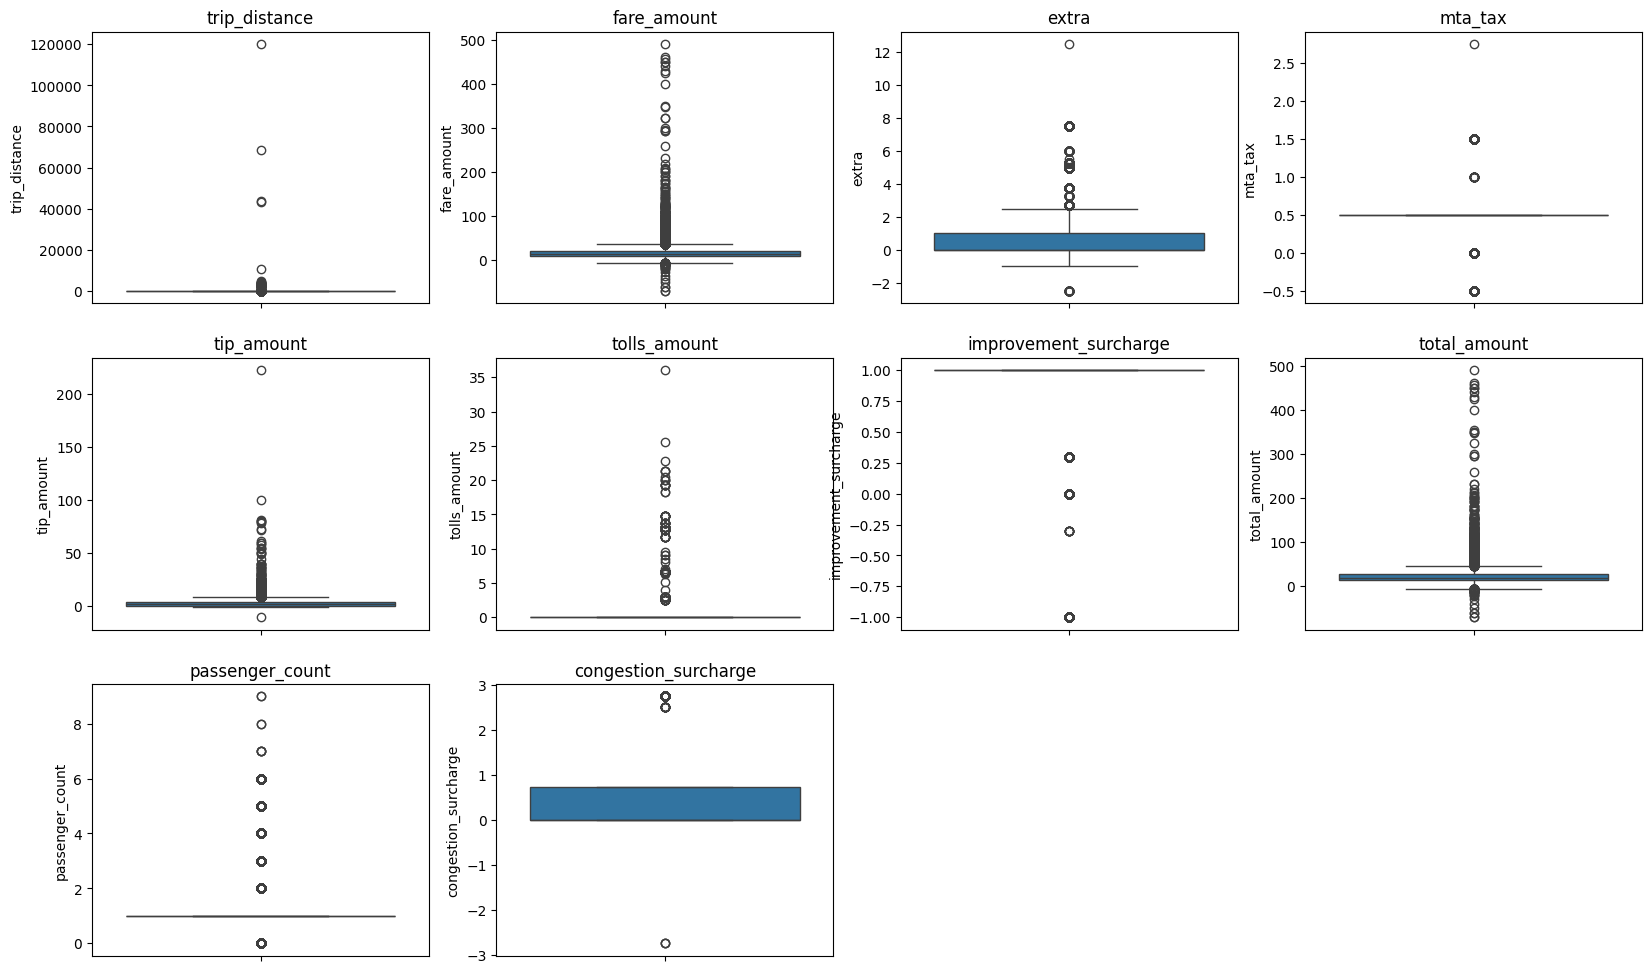

In [ ]:
# Detect outliers for each measure
ms_columns = ['trip_distance', 'fare_amount', 'extra',
              'mta_tax', 'tip_amount', 'tolls_amount',
              'improvement_surcharge', 'total_amount', 'passenger_count',
              'congestion_surcharge']

n_cols = 4
n_rows = (len(ms_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))

axes = axes.flatten()

for i, col in enumerate(ms_columns):
  sns.boxplot(y=df_imputed[col], ax=axes[i])
  axes[i].set_title(col)

for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.show()

Outlier detection insights:
1. There are many outliers in The measure columns
2. There are also negative payment values, which are hinted at in the previous section of the documentation
3. Payment values less than 0 will be removed, since it may be because of errors
4. The trip_distance column is also showing outliers with values up to 6 digits in miles, which may be because of errors. Therefore, extreme outliers will be removed.
5. An outlier in trip_distance is determined to be extreme when a taxi trip distance is impossible to achieve. In this case we will choose 3000 miles as the maximum distance a taxi from the East Coast (NYC) can achieve when travelling to the West Coast of the country.

In [ ]:
# Count and remove negative payment values
pay_columns = df_imputed[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']]
df_cleaned = df_imputed.copy()
for col in pay_columns:
  col_len = len(df_imputed[col])
  neg_vals = df_imputed[df[col] < 0][col].count()
  print(f"column {col} has {round(neg_vals / col_len * 100, 2)}% negative values")
  df_cleaned = df_cleaned[df_cleaned[col] >= 0]

column fare_amount has 0.26% negative values
column extra has 0.12% negative values
column mta_tax has 0.24% negative values
column tip_amount has 0.01% negative values
column tolls_amount has 0.0% negative values
column improvement_surcharge has 0.26% negative values
column total_amount has 0.26% negative values


The payment values have some negative values which have been removed in the code above.

In [ ]:
# Check for the percentage of extreme outliers data in trip_distance
td_outliers = df_cleaned[df_cleaned['trip_distance'] > 3000]
td_outlier_count = len(td_outliers)
td_outlier_percentage = td_outlier_count / len(df_cleaned) * 100
print(f"Trip_distance extreme outlier percentage (above 3000 miles): {round(td_outlier_percentage, 2)}%")

Trip_distance extreme outlier percentage (above 3000 miles): 0.03%


In [ ]:
# Remove outliers in trip_distance
df_cleaned = df_cleaned[df_cleaned['trip_distance'] <= 3000]

The extreme outliers in trip_distance are also removed to eliminate misleading data. Trips above 3000 miles are highly unlikely.

After checking and handling outliers in quantitative data, we can check for inconsistent value formats in categorical data.

In [ ]:
# Check for inconsistent data formats in categories
cats = ['VendorID', 'store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type']
for col in cats:
  print(f"{col} unique values: {df_cleaned[col].unique()}")

VendorID unique values: [2 1]
store_and_fwd_flag unique values: ['N' 'Y']
RatecodeID unique values: [ 1.  5.  4.  3.  2. 99.]
payment_type unique values: [1. 2. 3. 4. 5.]
trip_type unique values: [1. 2.]


In [ ]:
# Show percentage of each category in RatecodeID
df_cleaned['RatecodeID'].value_counts() / len(df_cleaned) * 100

,count
RatecodeID,
1.0,97.393184
5.0,2.234834
2.0,0.229365
4.0,0.083806
3.0,0.044109
99.0,0.014703


We can notice that there are values that are inconsistent with the data dictionary for column RatecodeID. Here we found some with rate code ID of 99. Since these are outside of the given categories (1-6) we will assign them to a separate category for unknown data later.

## **3. Data Transformation**

After the data is cleaned, we can create new columns to provide more insight from the data and show correct labels for numeric categorical columns.

New columns that can be created are:
1. Proper categorical data label column: vendor_name from vendorID, etc.
2. Trip time: Difference between dropoff time and pickup time
3. Pickup day: The day when the trip starts
4. Pickup hour: The hour when the trip starts
5. Pickup day type: Whether the trip was on weekdays or weekends
6. Zone pickup/dropoff difference: The difference between pickup and dropoff count in a taxi zone (shows if there are more pickups than dropoffs)
7. Zone dropoff/pickup difference: The difference between dropoff and pickup count in a taxi zone (shows if there are more dropoffs than pickups)
8. Zone name: The real names of taxi zones in pickup and dropoff location IDs
9. Borough name: The borough region of pickup and dropoff location IDs

In [ ]:
# Categorical data can be converted from numeric to string according to the data dictionary to give proper labelling during visualization
# The RatecodeID values of 99 will be labelled as unknown in ratecode_name
vendor_name_map = {1: 'Creative Mobile Technologies,LLC', 2: 'VeriFoneInc'}
ratecode_name_map = {1: 'Standard rate', 2: 'JFK', 3: 'Newark', 4: 'Nassau or Westchester', 5: 'Negotiated fare', 6: 'Group ride', 99: 'Unknown'}
payment_name_map = {1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided trip'}
trip_type_name_map = {1: 'Street-hail', 2: 'Dispatch'}

vendor_name = df_cleaned['VendorID'].map(vendor_name_map)
ratecode_name = df_cleaned['RatecodeID'].map(ratecode_name_map)
payment_type_name = df_cleaned['payment_type'].map(payment_name_map)
trip_type_name = df_cleaned['trip_type'].map(trip_type_name_map)

Creating new columns containing category names from existing data helps proper labelling when performing data visualization. Payment labels such as 'credit card', or 'cash' gives more insight than the categories '1' or '2'.

In [ ]:
df_cleaned_2 = df_cleaned.copy()
df_cleaned_2.insert(1, 'vendor_name', vendor_name)
df_cleaned_2.insert(6, 'ratecode_name', ratecode_name)
df_cleaned_2.insert(19, 'payment_type_name', payment_type_name)
df_cleaned_2.insert(21, 'trip_type_name', trip_type_name)

In the code above, we create a copy of the dataframe to insert new data transformation columns into the dataset.

In [ ]:
# Datetime data for passenger pick up and drop off can be used to create columns containing trip time length
df_cleaned_2['lpep_pickup_datetime'] = pd.to_datetime(df_cleaned_2['lpep_pickup_datetime'])
df_cleaned_2['lpep_dropoff_datetime'] = pd.to_datetime(df_cleaned_2['lpep_dropoff_datetime'])
trip_time = df_cleaned_2['lpep_dropoff_datetime'] - df_cleaned_2['lpep_pickup_datetime']
trip_time = trip_time.dt.total_seconds()
trip_time = trip_time / 60
df_cleaned_2.insert(4, 'trip_time', trip_time)

The trip time column can aid in exploring the statistics of travel time, such as maximum, minimum, or average travel time.

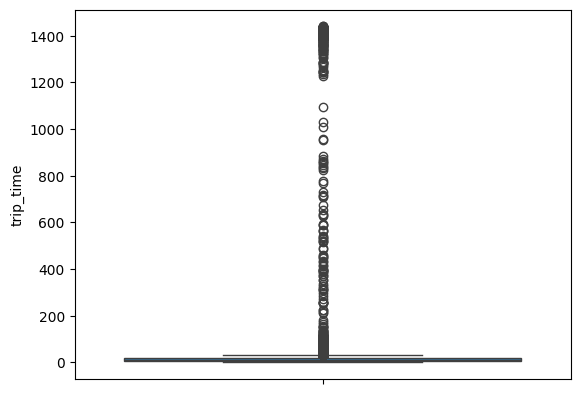

In [ ]:
# Check for outliers in trip_time
sns.boxplot(y=df_cleaned_2['trip_time'])
plt.show()

In [ ]:
# Calculate how many outliers there are
q1 = df_cleaned_2['trip_time'].quantile(0.25)
q3 = df_cleaned_2['trip_time'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_cleaned_2[(df_cleaned_2['trip_time'] < lower_bound) | (df_cleaned_2['trip_time'] > upper_bound)]
outlier_count = len(outliers)
print(f"There are {outlier_count} outliers in the trip_time column")

There are 3553 outliers in the trip_time column


In [ ]:
# outlier percentage
outlier_percentage = outlier_count / len(df_cleaned_2) * 100
print(f"Outlier percentage: {round(outlier_percentage, 2)}%")

Outlier percentage: 5.22%


NYC Taxi laws determine that [a driver may only transport passengers up to 10 hours in a day](https://www.nyc.gov/site/tlc/about/fatigued-driving-prevention-frequently-asked-questions.page), and the data shows there are trips that exceed the limit (600 minutes). We may assume the possiblities:
- There are errors in the system capturing the pickup and dropoff times, or
- There are drivers who break the time limit

Since it is inconclusive, the outliers will not be removed.

In [ ]:
# Datetime data can also be used to determine pick up days
pickup_day = df_cleaned_2['lpep_pickup_datetime'].dt.day_name()
df_cleaned_2.insert(5, 'pickup_day', pickup_day)

In [ ]:
# Datetime data can also give insight regarding the times when the passengers called the taxi or is picked up by it\
pickup_hour = df_cleaned_2['lpep_pickup_datetime'].dt.hour
df_cleaned_2.insert(6, 'pickup_hour', pickup_hour)

In [ ]:
# After knowing the pickup days and hours, we can categorize the pick up dates by weekday or weekend
pickup_day_type = df_cleaned_2['pickup_day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
df_cleaned_2.insert(7, 'pickup_day_type', pickup_day_type)

The new pickup date information above may help in performing analysis regarding peak demand hours during the day, the busiest day, and compare performance on weekends or weekdays.

In [ ]:
# Difference between pickup and dropoffs in each location can help us determine areas with many demands
pickup_count = df_cleaned_2.groupby('PULocationID')['PULocationID'].value_counts().reset_index(name='pickup_count')
dropoff_count = df_cleaned_2.groupby('DOLocationID')['DOLocationID'].value_counts().reset_index(name='dropoff_count')

pickup_count.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
dropoff_count.rename(columns={'DOLocationID': 'LocationID'}, inplace=True)

location_counts = pd.merge(pickup_count, dropoff_count, on='LocationID', how='outer').fillna(0)

# Create two calculations for use with PULocationID and DOLocationID respectively
# pickup_dropoff_difference shows how much more PULocationID sends out taxi than receives
# dropoff_pickup_difference shows how much more DOLocationID receives taxi than sending
location_counts['pickup_dropoff_difference'] = location_counts['pickup_count'] - location_counts['dropoff_count']
location_counts['dropoff_pickup_difference'] = location_counts['dropoff_count'] - location_counts['pickup_count']

location_counts.rename(columns={'LocationID': 'PULocationID'}, inplace=True)

df_clean_merged = df_cleaned_2.merge(location_counts[['PULocationID', 'pickup_dropoff_difference']], on='PULocationID', how='left')
df_clean_merged = df_clean_merged.merge(location_counts[['PULocationID', 'dropoff_pickup_difference']], left_on='DOLocationID', right_on='PULocationID', how='left')
df_clean_merged.drop('PULocationID_y', axis=1, inplace=True)
df_clean_merged.rename(columns={'PULocationID_x': 'PULocationID'}, inplace=True)

Above we calculate differences between pickup and dropoff counts in each taxi zone. A new dataframe is created here as a result of column merging. Some insights that can be explored with this column:
- Popular pickup zones with low dropoff demand (Identify high-request zones to get taxi rides)
- Popular dropoff zones with low pickup demand (Drivers may have to travel to other zones to pick up the next customer)

The zone ID used in the current dataset does not give much insight regarding NYC regions since it is numeric. We can use the NYC taxi zone lookup table to match the ID with the zone and borough name. The steps are applied below.

In [ ]:
# Use the taxi zone lookup dataset to include better labels for each zone
# Dataset source: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
tz = pd.read_csv('https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv')
tz.head(10)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone
6,7,Queens,Astoria,Boro Zone
7,8,Queens,Astoria Park,Boro Zone
8,9,Queens,Auburndale,Boro Zone
9,10,Queens,Baisley Park,Boro Zone


In [ ]:
# Are there duplicate values?
tz.duplicated().value_counts()

,count
False,265


In [ ]:
# Are there any null values?
tz.isnull().sum() / len(tz) * 100

,0
LocationID,0.000000
Borough,0.377358
Zone,0.377358
service_zone,0.754717


In [ ]:
# Drop null values
tz.dropna(inplace=True)

In [ ]:
# Include zone labels in the original dataset
df_clean_merged['PULocationBorough'] = df_clean_merged['PULocationID'].map(tz.set_index('LocationID')['Borough'])
df_clean_merged['DOLocationBorough'] = df_clean_merged['DOLocationID'].map(tz.set_index('LocationID')['Borough'])
df_clean_merged['PULocationZoneName'] = df_clean_merged['PULocationID'].map(tz.set_index('LocationID')['Zone'])
df_clean_merged['DOLocationZoneName'] = df_clean_merged['DOLocationID'].map(tz.set_index('LocationID')['Zone'])

## **4. Export Data**

Now that the data has been processed, we can export it to be used in data visualisation and storytelling. It is possible to either:
1. Export the new data to a .csv file and then add it manually to Looker Studio
2. Export the new data to a Google Sheets file, file which can then be connected to a Looker Studio data source

We will be using both approaches. The first method will be useful for backup, and the second method will provide convenience in data visualisation.

In [ ]:
df_clean_merged.head(10)

,VendorID,vendor_name,lpep_pickup_datetime,lpep_dropoff_datetime,trip_time,pickup_day,pickup_hour,pickup_day_type,store_and_fwd_flag,RatecodeID,...,payment_type_name,trip_type,trip_type_name,congestion_surcharge,pickup_dropoff_difference,dropoff_pickup_difference,PULocationBorough,DOLocationBorough,PULocationZoneName,DOLocationZoneName
0,2,VeriFoneInc,2023-01-01 00:26:10,2023-01-01 00:37:11,11.016667,Sunday,0,Weekend,N,1.0,...,Credit card,1.0,Street-hail,2.75,1613.0,444.0,Manhattan,Manhattan,Morningside Heights,Lincoln Square West
1,2,VeriFoneInc,2023-01-01 00:51:03,2023-01-01 00:57:49,6.766667,Sunday,0,Weekend,N,1.0,...,Credit card,1.0,Street-hail,0.00,-217.0,-1569.0,Manhattan,Manhattan,Bloomingdale,Central Park
2,2,VeriFoneInc,2023-01-01 00:35:12,2023-01-01 00:41:32,6.333333,Sunday,0,Weekend,N,1.0,...,Credit card,1.0,Street-hail,0.00,-260.0,174.0,Queens,Queens,Steinway,Old Astoria
3,1,"Creative Mobile Technologies,LLC",2023-01-01 00:13:14,2023-01-01 00:19:03,5.816667,Sunday,0,Weekend,N,1.0,...,Credit card,1.0,Street-hail,0.00,1433.0,2331.0,Manhattan,Manhattan,Central Harlem,Upper West Side North
4,1,"Creative Mobile Technologies,LLC",2023-01-01 00:33:04,2023-01-01 00:39:02,5.966667,Sunday,0,Weekend,N,1.0,...,Credit card,1.0,Street-hail,0.00,1433.0,-9866.0,Manhattan,Manhattan,Central Harlem,East Harlem North
5,2,VeriFoneInc,2023-01-01 00:53:31,2023-01-01 01:11:04,17.550000,Sunday,0,Weekend,N,1.0,...,Cash,1.0,Street-hail,2.75,1433.0,885.0,Manhattan,Manhattan,Central Harlem,Yorkville East
6,1,"Creative Mobile Technologies,LLC",2023-01-01 00:09:14,2023-01-01 00:26:39,17.416667,Sunday,0,Weekend,N,1.0,...,Credit card,1.0,Street-hail,2.75,-312.0,70.0,Brooklyn,Manhattan,Park Slope,Chinatown
7,2,VeriFoneInc,2023-01-01 00:11:58,2023-01-01 00:24:55,12.950000,Sunday,0,Weekend,N,1.0,...,Cash,1.0,Street-hail,0.00,-217.0,-5580.0,Manhattan,Manhattan,Bloomingdale,East Harlem South
8,2,VeriFoneInc,2023-01-01 00:41:29,2023-01-01 00:46:26,4.950000,Sunday,0,Weekend,N,1.0,...,Credit card,1.0,Street-hail,0.00,1433.0,-1613.0,Manhattan,Manhattan,Central Harlem,Morningside Heights
9,2,VeriFoneInc,2023-01-01 00:50:32,2023-01-01 01:13:42,23.166667,Sunday,0,Weekend,N,1.0,...,Credit card,1.0,Street-hail,2.75,-217.0,770.0,Manhattan,Manhattan,Bloomingdale,Lenox Hill East


In [ ]:
print(f"The final dataset has length of {len(df_clean_merged)} rows")

The final dataset has length of 68014 rows


In [ ]:
# Export cleaned data to be downloaded to the current device
df_clean_merged.to_csv('cleaned_trip_data.csv', index=False)

In [ ]:
# Export cleaned data to a google sheets file
!pip install gspread gspread-dataframe oauth2client

Above is shown the method to save the data locally to our own device. Below is the method used to export the new data to an online Google Sheets spreadsheet. With this new method, we are able to update data automatically and connect it to Looker Studio.

In [ ]:
import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
from gspread_dataframe import set_with_dataframe

In [ ]:
spreadsheet = gc.open_by_key('1SQgB1UyLB6ijUi2rZcASsfqNrEv9jxXAOnRyUBYMnM0')
worksheet = spreadsheet.get_worksheet(1)
set_with_dataframe(worksheet, df_clean_merged)

## **5. Data Analysis & Visualization**

After the final dataset have been created, we can start the analysis and visualization to gain insight which may help NYC TLC to optimize operations.

### **5.1 Trip Data**
We can start by analyzing data related to taxi trips and locations from the dataset.

Firstly we may start by visualizing how distributed trips are in each day of week. We may gain insight regarding the most busy day.

<ipython-input-57-f7d4a5e78828>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trip_count_by_day.index, y=trip_count_by_day.values, palette='YlOrRd')


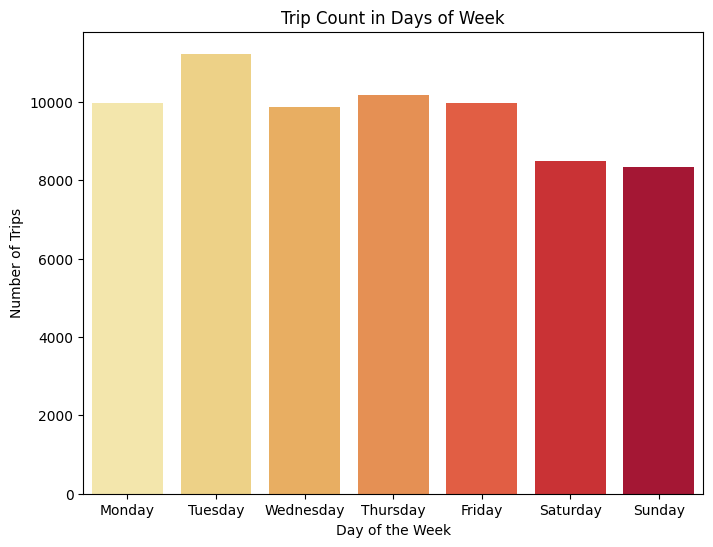

In [ ]:
trip_count_by_day = df_clean_merged['pickup_day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trip_count_by_day = trip_count_by_day.reindex(day_order)

plt.figure(figsize=(8, 6))
sns.barplot(x=trip_count_by_day.index, y=trip_count_by_day.values, palette='YlOrRd')
plt.title('Trip Count in Days of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

Here we can see that Tuesday has the highest demand for taxi trips, with Sunday havint the least demand. From the chart we also know that weekends have less demand for taxi than weekdays. Overall, I believe that strategies based on this chart can be applied across the weekday categories, as the difference between trip counts within working days and weekends is similar.

Next, we can also visualize peak hours during the day.

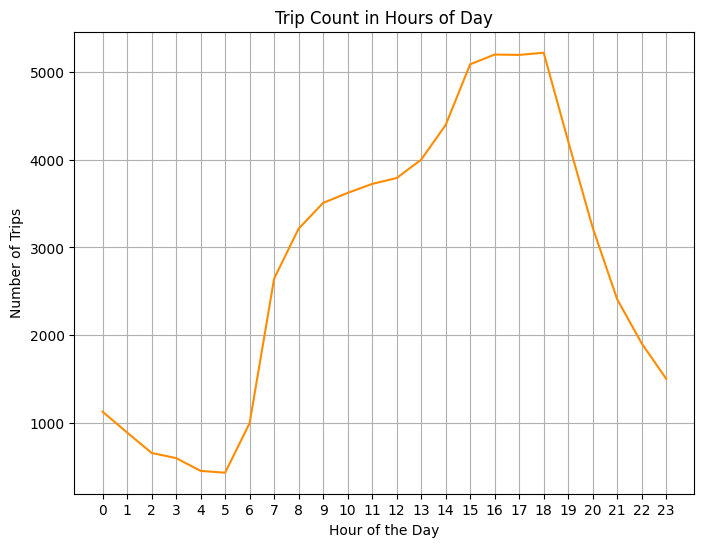

In [ ]:
trip_count_by_hour = df_clean_merged['pickup_hour'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.lineplot(x=trip_count_by_hour.index, y=trip_count_by_hour.values, color='darkorange')
plt.title('Trip Count in Hours of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

The chart above shows that taxi demand increases during the afternoon and decreases during the night and mornings. Combining this information with trip counts in each weekday, we know that taxis should be more available during those times to meet the demand.

Now, it would be useful to know where the taxis should be more available. One way to visualize the demand for each NYC region is to show the number of pickups in each borough.

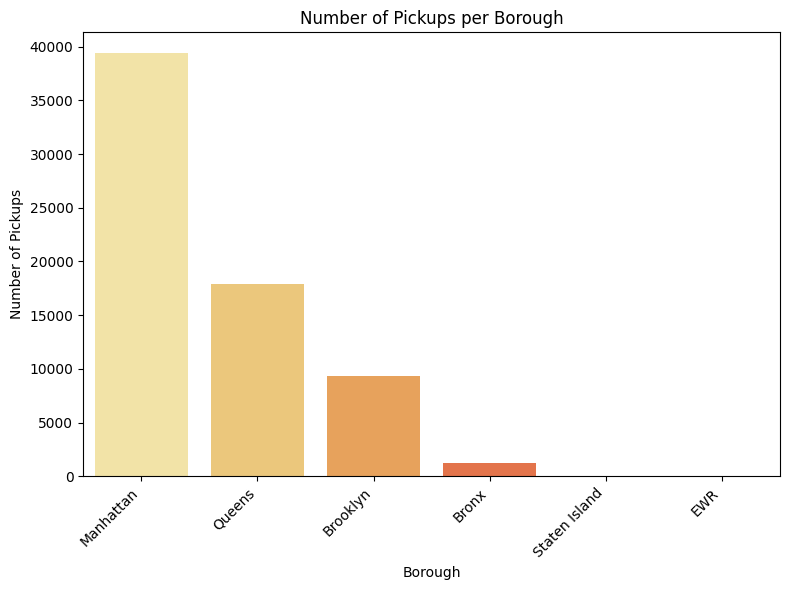

In [ ]:
pickup_count_by_borough = df_clean_merged['PULocationBorough'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=pickup_count_by_borough.index, y=pickup_count_by_borough.values, palette='YlOrRd')
plt.title('Number of Pickups per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the chart above, we can see that Manhattan has the highest demand, towering over the rest of the regions. This shows that most of the taxi demand is centralized around Manhattan and so the focus should be around that area.

To make it more specific, we may drill down into taxi zones instead of just regions / boroughs. This gives us more specific insight about where passengers get picked up and dropped off.

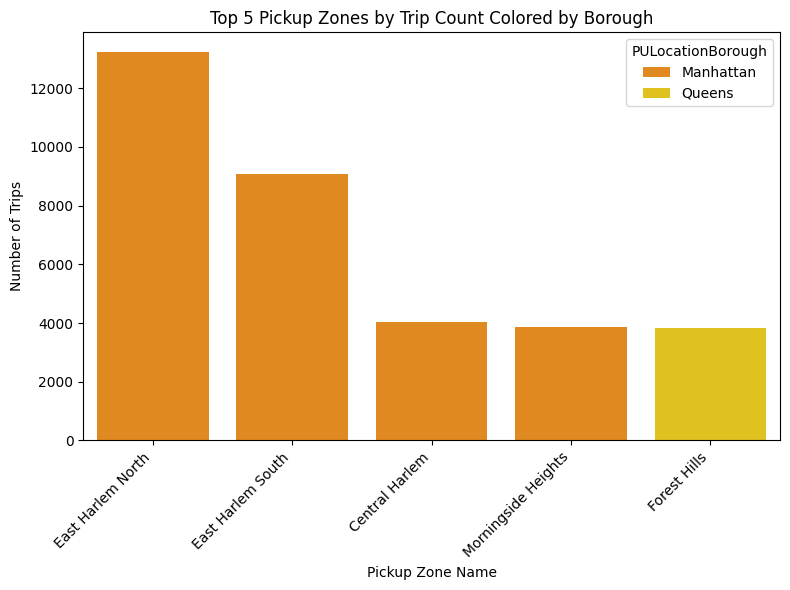

In [ ]:
pickup_counts = df_clean_merged['PULocationZoneName'].value_counts().sort_values(ascending=False).head(5)
pickup_zones_top5 = pickup_counts.index.tolist()

pickup_df_top5 = df_clean_merged[df_clean_merged['PULocationZoneName'].isin(pickup_zones_top5)].copy()

pickup_df_top5['count'] = pickup_df_top5['PULocationZoneName'].map(pickup_counts)
pickup_df_top5['PULocationZoneName'] = pd.Categorical(pickup_df_top5['PULocationZoneName'], categories=pickup_zones_top5, ordered=True)
pickup_df_top5 = pickup_df_top5.sort_values('count', ascending=False)

custom_palette = {
    'Manhattan': 'darkorange',
    'Queens': 'gold',
    'Brooklyn': 'salmon'
}

plt.figure(figsize=(8, 6))
sns.barplot(x='PULocationZoneName', y='count', hue='PULocationBorough', data=pickup_df_top5, palette=custom_palette, dodge=False)
plt.title('Top 5 Pickup Zones by Trip Count Colored by Borough')
plt.xlabel('Pickup Zone Name')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

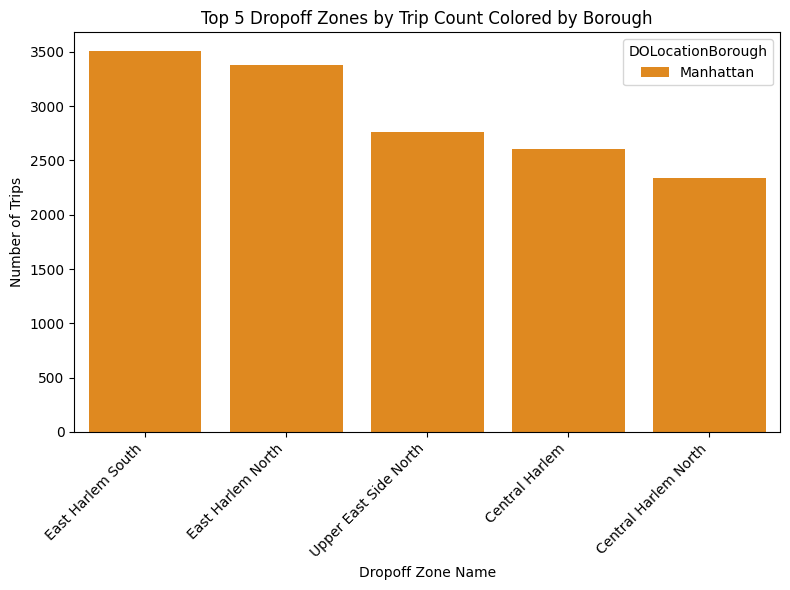

In [ ]:
dropoff_counts = df_clean_merged['DOLocationZoneName'].value_counts().sort_values(ascending=False).head(5)
dropoff_zones_top5 = dropoff_counts.index.tolist()

dropoff_df_top5 = df_clean_merged[df_clean_merged['DOLocationZoneName'].isin(dropoff_zones_top5)].copy()

dropoff_df_top5['count'] = dropoff_df_top5['DOLocationZoneName'].map(dropoff_counts)
dropoff_df_top5['DOLocationZoneName'] = pd.Categorical(dropoff_df_top5['DOLocationZoneName'], categories=dropoff_zones_top5, ordered=True)
dropoff_df_top5 = dropoff_df_top5.sort_values('count', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='DOLocationZoneName', y='count', hue='DOLocationBorough', data=dropoff_df_top5, palette=custom_palette, dodge=False)
plt.title('Top 5 Dropoff Zones by Trip Count Colored by Borough')
plt.xlabel('Dropoff Zone Name')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We can see that within the top 5 pickup and dropoff locations, the majority of passengers travel from and to zones within Manhattan. This reinforces the insights above regarding demand centralization in Manhattan and now we know which zones are the most popular within the region.

Next, I'd like to know whether there are zones with more pickup than dropoffs or vice versa. This information allows us to know whether it's easy or not for drivers to pick up passengers after dropping them off in a location.

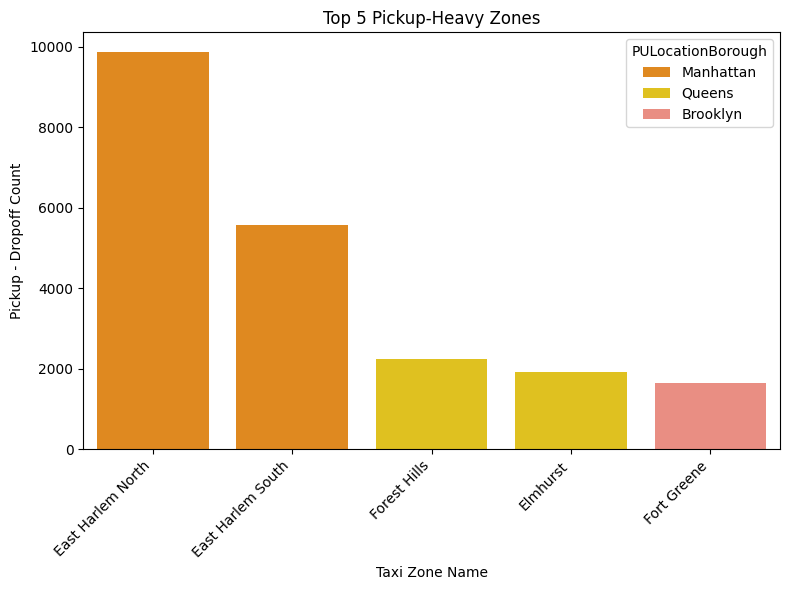

In [ ]:
zone_difference = df_clean_merged.groupby('PULocationZoneName').agg({
    'pickup_dropoff_difference': 'mean',
    'PULocationBorough': 'first'
}).sort_values(by='pickup_dropoff_difference', ascending=False).head(5).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='PULocationZoneName', y='pickup_dropoff_difference', hue='PULocationBorough', data=zone_difference, palette=custom_palette, dodge=False)
plt.title('Top 5 Pickup-Heavy Zones')
plt.xlabel('Taxi Zone Name')
plt.ylabel('Pickup - Dropoff Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

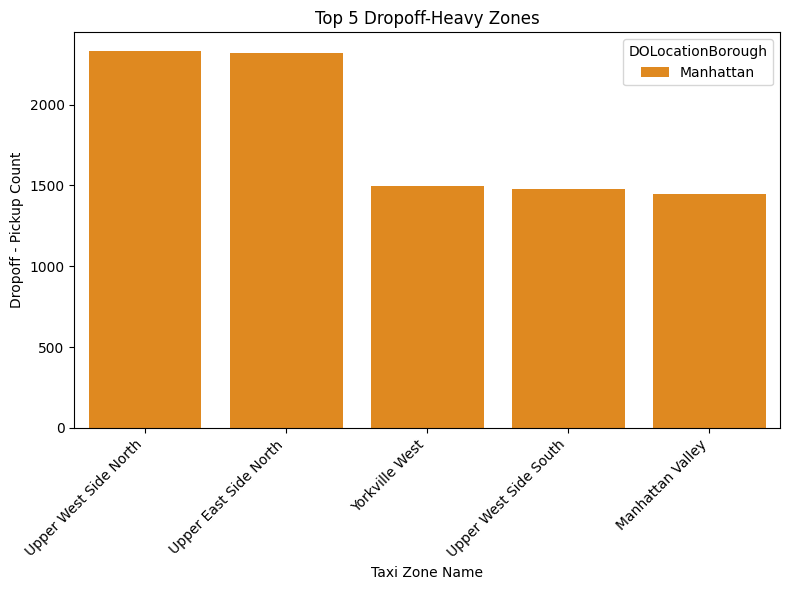

In [ ]:
zone_difference_dropoff = df_clean_merged.groupby('DOLocationZoneName').agg({
    'dropoff_pickup_difference': 'mean',
    'DOLocationBorough': 'first'
}).sort_values(by='dropoff_pickup_difference', ascending=False).head(5).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='DOLocationZoneName', y='dropoff_pickup_difference', hue='DOLocationBorough', data=zone_difference_dropoff, palette=custom_palette, dodge=False)
plt.title('Top 5 Dropoff-Heavy Zones')
plt.xlabel('Taxi Zone Name')
plt.ylabel('Dropoff - Pickup Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The charts above shows that there are areas with low operational efficiency as some areas have higher dropoff counts than pickup counts. This may mean that drivers may not be able to get passengers immediately after the delivery is completed. Drivers may have to travel to busy areas first to pick up passengers, and there is idle time between trips.

### **5.2 Payment Data**
Furthermore, we can also analyze data related to trips payments.

First, we can visualize customer payment behavior based on trip and payment type, showing the distribution of revenue and tip behavior among different categories.

In [ ]:
payment_summary = df_clean_merged.groupby(['trip_type_name', 'payment_type_name']).agg(
    total_revenue=('total_amount', 'sum'),
    total_tip_amount=('tip_amount', 'sum')
).reset_index()

payment_summary = payment_summary.sort_values(by='total_revenue', ascending=False)

cols = [col for col in payment_summary.columns if col != 'total_revenue'] + ['total_revenue']
payment_summary = payment_summary[cols]

display(payment_summary)

,trip_type_name,payment_type_name,total_tip_amount,total_revenue
5,Street-hail,Credit card,142437.88,1032752.56
4,Street-hail,Cash,5.00,403309.87
1,Dispatch,Credit card,3420.53,34703.09
0,Dispatch,Cash,0.00,12574.88
7,Street-hail,No charge,4.65,3055.75
6,Street-hail,Dispute,10.50,609.65
3,Dispatch,No charge,0.00,386.60
8,Street-hail,Unknown,0.00,29.50
2,Dispatch,Dispute,0.00,11.00


From the table above we can summarize:
- Street-hail is the most popular and profitable pick-up method compared to online booking
- Credit cards are the most common way to pay
- Credit card users also tip the most

One insight we can get is that now we know that we can promote credit card payments to increase tip giving to drivers. However, it may also be possible that cash tips are not recorded in the system, which skews the tip distribution.

Next, it would be insightful if we can get the average revenue of each main payment method.

<ipython-input-85-5bae3a7929fd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_revenue_by_payment.index, y=average_revenue_by_payment.values, palette='viridis')


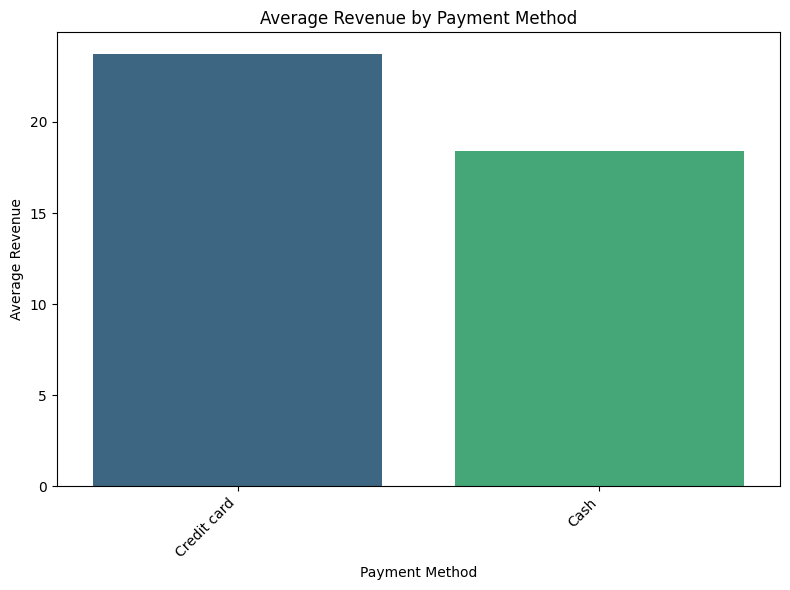

In [ ]:
average_revenue_by_payment = df_clean_merged.groupby('payment_type_name')['total_amount'].mean().sort_values(ascending=False).head(2)

plt.figure(figsize=(8, 6))
sns.barplot(x=average_revenue_by_payment.index, y=average_revenue_by_payment.values, palette='viridis')
plt.title('Average Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the bar chart above, we can see that on average, credit card payments have a higher revenue than cash payments. This supports our findings that credit cards are the most popular payment method.

We have visualized the demand for trips based on days of the week before. Now it would be more insightful to know whether the revenue follows the same trend.

<ipython-input-89-ce36a68c1f2e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_day.index, y=revenue_by_day.values, palette='YlOrRd')


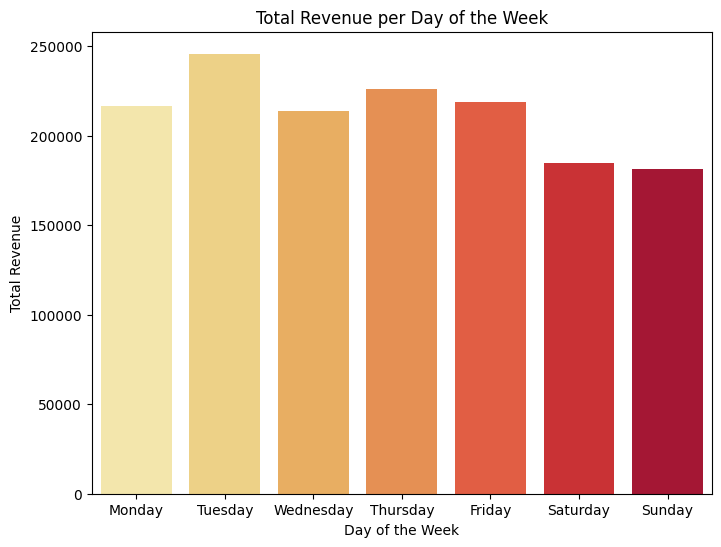

In [ ]:
revenue_by_day = df_clean_merged.groupby('pickup_day')['total_amount'].sum()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
revenue_by_day = revenue_by_day.reindex(day_order)

plt.figure(figsize=(8, 6))
sns.barplot(x=revenue_by_day.index, y=revenue_by_day.values, palette='YlOrRd')
plt.title('Total Revenue per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.show()

The chart above shows that the revenue is highest on Tuesdays and lowest on Sundays, which is the same as the trip count or demand chart in the section before.

We can also visualize the trend of revenue based on the date and time. This gives us a larger picture of the revenue trend over time.

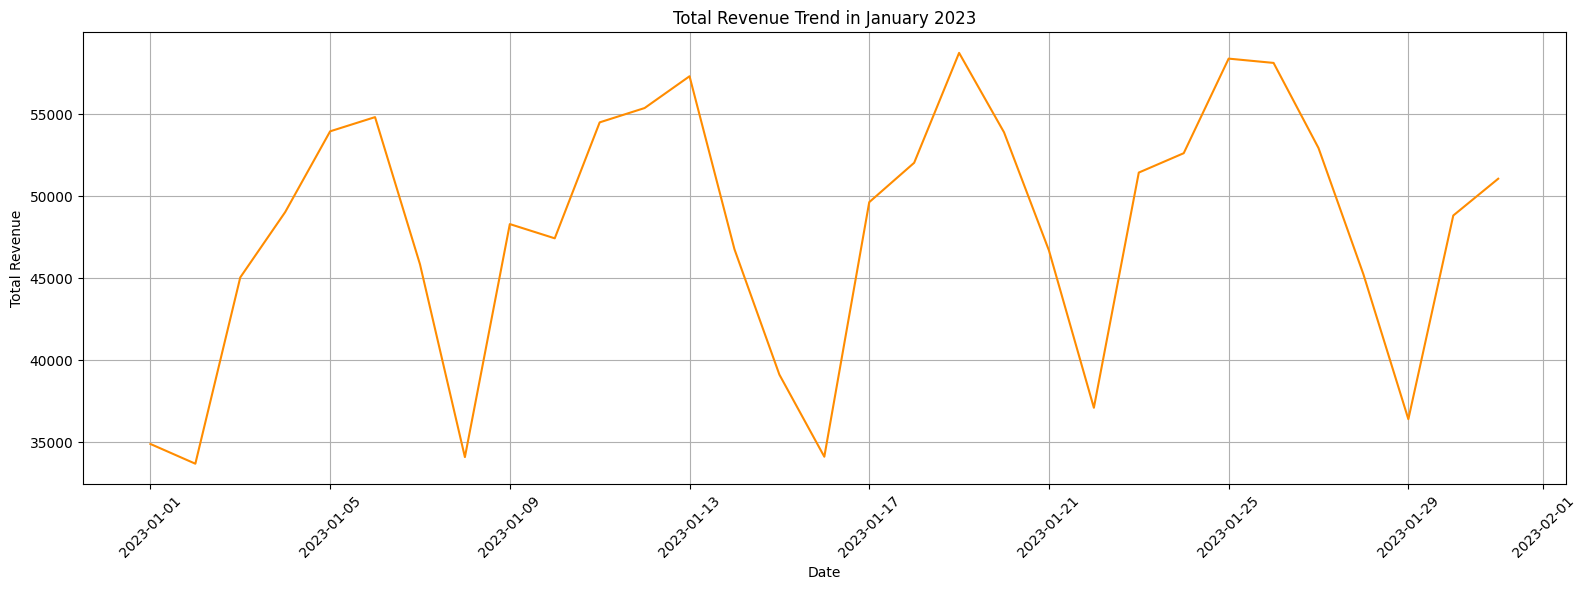

In [97]:
revenue_by_date = df_clean_merged.groupby(df_clean_merged['lpep_pickup_datetime'].dt.date)['total_amount'].sum()
revenue_by_date.index = pd.to_datetime(revenue_by_date.index)

start_date = '2023-01-01'
end_date = '2023-01-31'
revenue_january_2023 = revenue_by_date.loc[start_date:end_date]

plt.figure(figsize=(16, 6))
sns.lineplot(x=revenue_january_2023.index, y=revenue_january_2023.values, color='darkorange')
plt.title('Total Revenue Trend in January 2023')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

From the line chart above, we can see the revenue trend of the dataset over time. By matching the lowest and highest points and weekday data from our calendar, we know that they mostly happen on weekends, while peak revenue points happen on weekdays.

### **5.3 Strategy & Further Analysis**
After we analyze the data in previous sections, we may provide data-driven suggestions that can be applied by NYC TLC to increase operation efficiency and revenue.

1. Taxi Distribution
  - Increase Taxi Availability in Busy Pickup Zones such as Manhattan Taxi Zones
    - As most passengers use street-hails, this will make it easier for drivers to encounter customers
    - It will also help drivers meet customer demands in peak hours of busy days.

  - While Also Maintaining Minimum Number of Taxis in All Regions
    - While taxi placements should center around busy areas to meet passenger demands, NYC TLC will also need to ensure taxi availabilty to all regions as it is one of their main operational goals.
    - Furthermore, it will avoid excess taxis in high-demand zones where idle taxis may get passengers in other zones.

2. Revenue & Driver Incentive
    - Add Surcharge for Trips to Low-demand Areas
      - This compensates for idle time between trips when going from low-demand to higher-demand taxi zones
      - This may also compensate potential passenger unavailability on driver trips to busy areas

    - Incentivize Serving Low-demand Areas
      - As drivers may avoid areas where passengers often go to low-pickup zones, they may be given monetary bonuses from trips going to such locations
      - e.g. higher shares of the trip revenue, promoting tips with cashless payments

Lastly, I would also like to note that these suggestions and analyses have some limitations. Some insights and suggestions can be stronger given more concrete evidence. Below are some data that can be used if they exist or be researched further to support the suggestions and findings above:

1. Taxi Distribution
  - Taxi Base Location & Fleet Size Data: Taxi availability in each zone can be more accurate
  - Next pickup location data: Zone visited after dropoff can help us know the next locations that drivers often go to after they dropped of passengers
  - Unfulfilled trip demand data: We can know the demand of each zone more accurately. However, this may be limited by the fact that most passengers use street-hails instead of online booking and therefore this data is more difficult to obtain.

2. Revenue & Driver Incentive
  - Idle time data between the dropoff time and the next pickup: Knowing the average time it takes to get a passenger in each zone may aid in calculating surcharges and incentives for drivers.

Some notes regarding outliers in the data above:

- Trip Distance: There are impossible trip distances above 3000 miles. As trips below the given measure is possible in practice, only extreme outliers above 3000 miles are removed. This highlights the possibility that there are system errors when recording the trip distance which can be investigated by NYC TLC.

- Trip time: There are trip times exceeding the daily trip time limit above 10 hours per day, up to 23 hour trips. This highlights that there are either system errors when recording the trip date and time, or there are drivers who do not follow the rules and exceed the given limit.